# Calculus for Machine Learning

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



## Differential Calculus

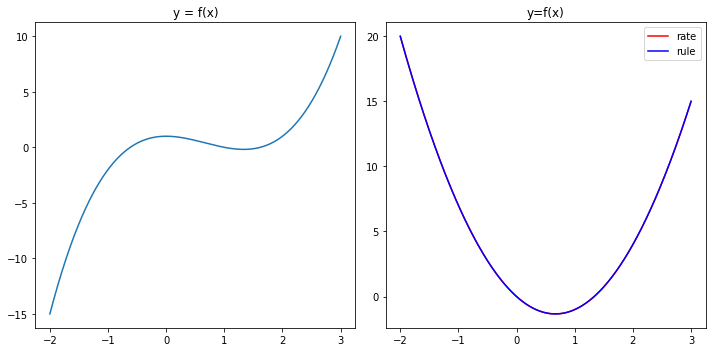

In [2]:
# Define function f(x)
def f(x):
    return (np.power(x,3)-(2*(np.power(x,2)))+1)

# compute f(x) from x=-2 to x=3
x = np.linspace(-2, 3, 500)
y = f(x)


# plot f(x) on left half of the figure
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.plot(x,y)
ax.set_title('y = f(x)')

# f'(x) uisng rate of change
delta_x = 0.0001
y1 = (f(x+delta_x)-f(x))/delta_x

# f'(x) uisng the rule
y2 = (3*(np.power(x,2)))-(4*x)

# plot f'(x) on right half of the figure
ax = fig.add_subplot(122)
ax.plot(x, y1, c = "r", alpha = 1, label = 'rate')
ax.plot(x, y2, c = "b", alpha = 1, label = 'rule')
ax.legend()
ax.set_title('y=f(x)')
plt.tight_layout()
plt.savefig('/home/chinmayee/my_machine_learning_journey/100_Days_of_code_challenge/df_calculus.png', dpi=300)
plt.show()



## Integration 

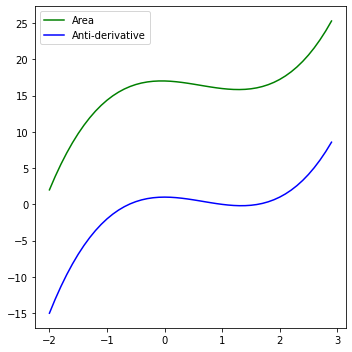

In [3]:
def f(x1):
    return ((3*np.power(x1,2))-(4*x1))


# Set up x from -10 to 10 with small steps
delta_x1 = 0.1     
x1 = np.arange(-2 , 3, delta_x1)

# f(x)dx
fx = f(x1)*delta_x1
# integration of f(x)dx
y_ = fx.cumsum()

# antiderivative f(x)
y_1 = (np.power(x1,3)-(2*(np.power(x1,2)))+1)

# plot
plt.figure(figsize=(5,5))
plt.plot(x1, y_, c='g', label = 'Area')
plt.plot(x1, y_1, c='b', label = 'Anti-derivative')
plt.tight_layout()
plt.legend()
plt.savefig('/home/chinmayee/my_machine_learning_journey/100_Days_of_code_challenge/integration.png', dpi=300)

plt.show()

            




## Gradient of Vector function

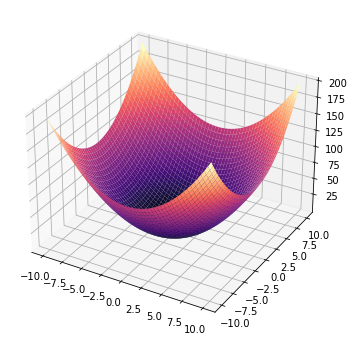

In [4]:
# Define the range for x and y

x = np.linspace(-10,10, 500)
xv, yv = np.meshgrid(x, x, indexing='ij')

# compute f(x,y) = x^2 + y^2
zv = np.power(xv,2) + np.power(yv,2)

# plot the surface

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(xv, yv, zv, cmap = 'magma') #'viridis', 'plasma', 'inferno', 'magma', 'cividis'

plt.savefig('/home/chinmayee/my_machine_learning_journey/100_Days_of_code_challenge/gradient_1.png', dpi=300)

plt.show()

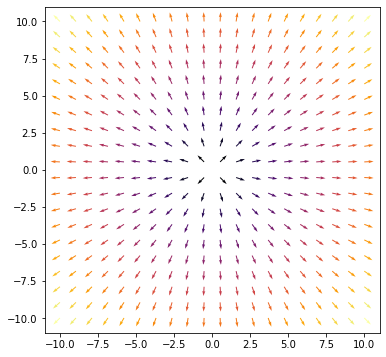

In [5]:
x = np.linspace(-10, 10, 20)

xv, yv = np.meshgrid(x, x, indexing='ij')

fx = 2*xv
fy = 2*yv

mod = np.sqrt((fx)**2+(fy)**2)

dir_x = fx/mod
dir_y = fy/mod

plt.figure(figsize=(6,6))
plt.quiver(xv, yv, dir_x, dir_y, mod, cmap='inferno')
plt.savefig('/home/chinmayee/my_machine_learning_journey/100_Days_of_code_challenge/gradient_2.png', dpi=300)

plt.show()

In [6]:
def f(x,y):
    return np.power(x,2) + np.power(y,2)

angles = np.arange(0, 360, 0.1)

x, y = 1,1
step = 0.0001

maxdf, maxangle = -np.inf, 0

for angle in angles:
    
    rad = angle*(np.pi)/180
    dx, dy = np.sin(rad)*step, np.cos(rad)*step
    df = (f(x+dx, y+dy)- f(x, y))/step
    if df > maxdf:
        maxdf, maxangle = df, angle
print(maxangle)
print(maxdf)
dx, dy = np.sin(maxangle*np.pi/180), np.cos(maxangle*np.pi/180)


print(dx, dy)
gradx, grady = dx*maxdf, dy*maxdf

print(f"Max rate of change at {maxangle} degrees")
print(f"Gradient vector at ({x},{y}) is ({dx*maxdf},{dy*maxdf})")




            

45.0
2.828527124743019
0.7071067811865475 0.7071067811865476
Max rate of change at 45.0 degrees
Gradient vector at (1,1) is (2.000070710675876,2.0000707106758764)


## Jacobian

⎡     -x - 2⋅y             -x - 2⋅y    ⎤
⎢    ℯ                  2⋅ℯ            ⎥
⎢ ────────────────    ──────────────── ⎥
⎢                2                   2 ⎥
⎢ ⎛ -x - 2⋅y    ⎞     ⎛ -x - 2⋅y    ⎞  ⎥
⎢ ⎝ℯ         + 1⎠     ⎝ℯ         + 1⎠  ⎥
⎢                                      ⎥
⎢     -3⋅x - 4⋅y          -3⋅x - 4⋅y   ⎥
⎢  3⋅ℯ                 4⋅ℯ             ⎥
⎢──────────────────  ──────────────────⎥
⎢                 2                   2⎥
⎢⎛ -3⋅x - 4⋅y    ⎞   ⎛ -3⋅x - 4⋅y    ⎞ ⎥
⎢⎝ℯ           + 1⎠   ⎝ℯ           + 1⎠ ⎥
⎢                                      ⎥
⎢     -5⋅x - 6⋅y          -5⋅x - 6⋅y   ⎥
⎢  5⋅ℯ                 6⋅ℯ             ⎥
⎢──────────────────  ──────────────────⎥
⎢                 2                   2⎥
⎢⎛ -5⋅x - 6⋅y    ⎞   ⎛ -5⋅x - 6⋅y    ⎞ ⎥
⎣⎝ℯ           + 1⎠   ⎝ℯ           + 1⎠ ⎦
